In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,1514764800000000000,142.00,1520,1
1,Aracaju,1514764800000000000,14.21,1522,6
2,Aracaju,1514764800000000000,71.55,1520,1
3,Aracaju,1514764800000000000,3.01,1521,7
4,Aracaju,1514764800000000000,24.51,1522,8


In [ ]:
df['Data'] = df['Data'].astype('int64')

In [ ]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df['Receita'] = df['Vendas'] * df['Qtde']

In [ ]:
# Saber a receita por ano
df.groupby(df['Data'].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criar a coluna Data em anos
df['Ano'] = df['Data'].dt.year

In [ ]:
#Ver uma amostra da tabela atualizada
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
45,Recife,2019-01-01,15.90,983,8,127.20,2019
172,Natal,2019-01-02,6.70,1035,1,6.70,2019
96,Fortaleza,2019-01-01,23.31,1004,4,93.24,2019
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2018
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019


In [ ]:
df['Mês'], df['Dia'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019,1,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2
92,Aracaju,2018-01-01,37.46,1520,7,262.22,2018,1,1
128,Natal,2019-01-02,36.84,1034,1,36.84,2019,1,2
9,Recife,2019-01-01,11.85,980,7,82.95,2019,1,1


In [ ]:
# Data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calcular a diferença de dias
df['Diferença dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Diferença dias
47,Salvador,2019-01-01,190.03,1036,2,380.06,2019,1,1,365 days
177,Natal,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days
103,Aracaju,2018-01-01,12.62,1522,3,37.86,2018,1,1,0 days
77,Natal,2019-04-01,426.00,853,3,1278.00,2019,4,1,455 days
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,2019,1,1,365 days
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days
213,Salvador,2019-01-02,42.12,1035,1,42.12,2019,1,2,366 days
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days
195,Salvador,2019-01-02,44.89,1036,3,134.67,2019,1,2,366 days
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2019,2,13,408 days


In [ ]:
df['Trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Diferença dias,Trimestre_venda
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10,405 days,1
55,Recife,2019-01-01,20.03,983,4,80.12,2019,1,1,365 days,1
61,Natal,2018-09-11,724.00,853,2,1448.00,2018,9,11,253 days,3
51,Recife,2019-01-01,146.95,982,2,293.90,2019,1,1,365 days,1
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018,1,1,0 days,1
6,Natal,2018-07-02,322.00,852,4,1288.00,2018,7,2,182 days,3
73,Recife,2019-01-01,39.71,981,5,198.55,2019,1,1,365 days,1
60,Recife,2019-01-01,37.97,983,1,37.97,2019,1,1,365 days,1
35,Fortaleza,2019-01-01,133.97,1005,2,267.94,2019,1,1,365 days,1


In [ ]:
#Filtrar as vendas de 21019 do mês de março
# Usaremos a função .loc pra fazer uma espécie de "busca conjugada", unindo os critérios com o "&"
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
# Observe que venda_marco_19 é uma objeto criado para visualizar nosso filtro. Ou seja, evitamos criar uma nova coluna.
# Se fôssemos criar uma coluna para cada busca, poderíamos acabar poluindo nossa tabela.
# Como disse Lira: "O que não ajuda, atrapalha." Então retira logo no começo da etapa de tratamento.
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Mês,Dia,Diferença dias,Trimestre_venda
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3,10,433 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,3,8,431 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3,14,437 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,3,2,425 days,1


In [ ]:
# INÍCIO DA AULA 4
#Contar quantas vendas foram realizadas por critério. Nesse caso, por loja ID
import matplotlib as plot
df['LojaID'].value_counts(ascending= False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

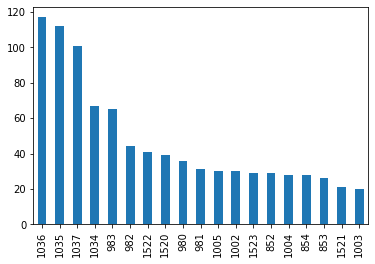

In [ ]:
#Plotar o gráfico das vendas por loja (acima)
df['LojaID'].value_counts(ascending= False).plot.bar();

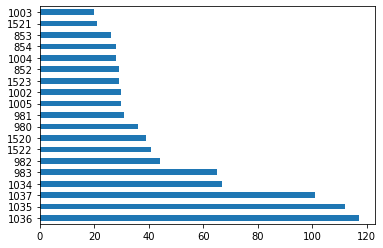

In [ ]:
#Plotando o gráfico acima na horizontal
df['LojaID'].value_counts(ascending= False).plot.barh();

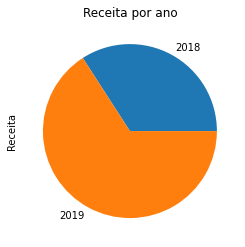

In [ ]:
#Plotar receita por ano em gráfico tipo pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie(title = 'Receita por ano');

In [ ]:
#Contar vendas por cidade
df["Cidade"].value_counts(ascending= False)

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

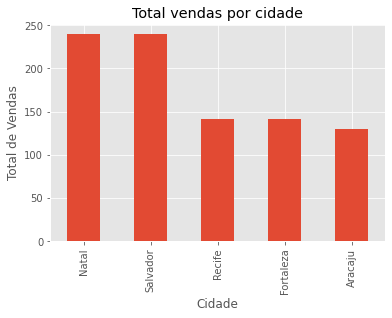

In [ ]:
# Adicionar títulos e alterar nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts(ascending= False).plot.bar(title = 'Total vendas por cidade')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [ ]:
#Alterar estilo dos gráficos
plt.style.use("ggplot")

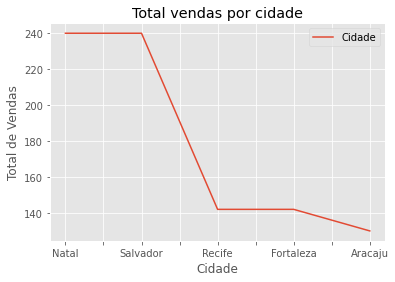

In [ ]:
#Inserir legenda e alterar para linha 
df['Cidade'].value_counts(ascending= False).plot(title = 'Total vendas por cidade')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")
plt.legend();

In [ ]:
#Criar coluna Ano_venda
df['Ano_venda'] = df['Data'].dt.year
df.sample(100)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Mês,Dia,Diferença dias,Trimestre_venda,Ano_venda
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,1,1,365 days,1,2019
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,1,1,365 days,1,2019
10,Salvador,2019-01-01,30.97,1036,1,30.97,1,1,365 days,1,2019
46,Aracaju,2018-01-01,41.42,1522,2,82.84,1,1,0 days,1,2018
76,Salvador,2019-01-01,39.51,1035,3,118.53,1,1,365 days,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
4,Salvador,2019-02-14,19.47,1037,3,58.41,2,14,409 days,1,2019
171,Salvador,2019-01-02,136.45,1035,3,409.35,1,2,366 days,1,2019
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,1,1,365 days,1,2019
28,Natal,2019-02-13,705.00,853,2,1410.00,2,13,408 days,1,2019


In [ ]:
#Selecionar vendas de 2019
df_2019 = df[df['Ano_venda'] != 2018]
df_2019.dtypes

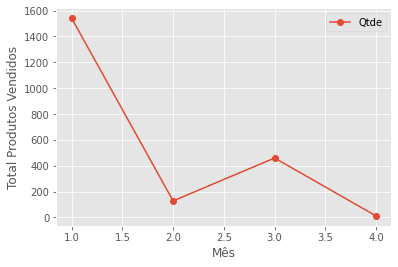

In [ ]:
# Criar um gráfico de linha agrupando vendas de 2019, mostrando quantidade x mês
# Marker could be *, o, v and others
df_2019.groupby(df_2019['Mês'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();


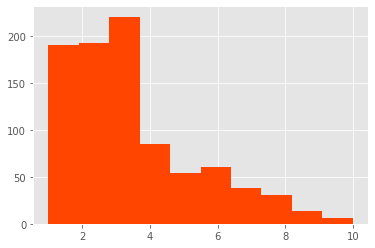

In [ ]:
#Histograma
plt.hist(df['Qtde'], color ="orangered");

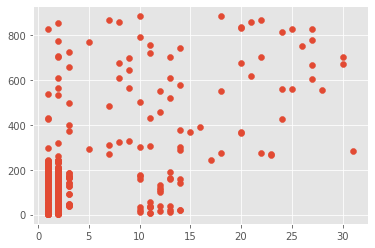

In [ ]:
#DISPERSÃO
plt.scatter(x=df['Dia'], y=df['Vendas']);

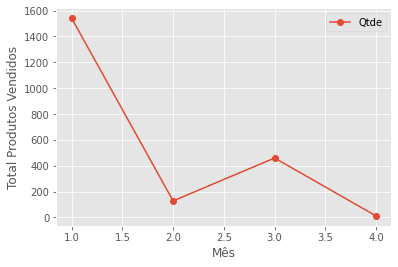

In [ ]:
#Salvar gráfico
df_2019.groupby(df_2019['Mês'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig("gráfico QTDE x Mês.png")